## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Import data

In [2]:
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


## Missing Values 처리
연속형 변수일 경우, 다음과 같은 방법 사용 가능
1. 특정 값 지정
2. mean, median으로 대체
3. 다른 데이터를 통해 예측
4. 앞 뒤 데이터로 보완



범주형 변수일 경우,
1. 특정값 지정
2. 최빈값으로 대체
3. 예측값으로 대체
4. 앞 뒤 데이터로 보완

In [3]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [4]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [5]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [6]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [7]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [8]:
# 196, 197, 198은 국가명 기간 빼고 모두 결측이므로 삭제
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [9]:
# 해당 결측치는 
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


In [10]:
# 전 후 값 확인
trade[trade.국가명=='미국']
# 전후 값 188, 194임
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [11]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [12]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


## 중복 데이터

In [13]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [14]:
# 중복 데이터 확인
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [15]:
# 중복데이터 제거 (last옵션 추가하면 마지막 행의 것만 남음)
trade.drop_duplicates(inplace=True)

## Outlier Detection

[참고 사이트](https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07)

z score 이용: $\frac{X-\mu}{\sigma}$   
![z-score image](https://miro.medium.com/max/700/0*2NlsLGlMtgtII_hN.)
단, z-score의 한계점 존재.   
mean와 sd를 사용하기 때문에 outlier에 영향을 받음. 그리고 데이터 사이즈가 작을경우(<12) 잘 감지해내지 못함.

IQR(Interquartile range) method 이용: $Q_3 - Q_1$   
![IQR image](https://i2.wp.com/makemeanalyst.com/wp-content/uploads/2017/05/IQR-1.png?resize=431%2C460)

다음과 같은 전략 사용 가능
1. 이상치를 삭제하고, 이상치끼리 따로 분석할 수 있음.
2. 이상치를 다른 값으로 대체.(최대값, 최소값, 예측값 등)
3. binning을 통해 수치형 -> 범주형

In [16]:
# 이상치 함수
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
# 이상치 아닌 값 리턴하는 함수
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [17]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [18]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [19]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [20]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [21]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)].index

outlier2(trade, '무역수지')

Int64Index([], dtype='int64')

## Normalization
- k-Nearest Neighbors, k-Means, Logistic Regression, SVM, Perceptrons, PCA, LDA에 사용.
- Naive Bayes, Decision Tree, Random Forest, XGBoost, LightGBM에는 사용x.
- normalize를 하면 spherical contour가 되는데, 더 빠르게 학습하고 overfitting 가능성 낮출 수 있음.
- Standardization = $\frac{X-\mu}{\sigma}$   
=> 평균을 0, 분산을 1로 변환
- Min-Max Scaling = $\frac{X-X_min}{X_max-X_min}$   
=> 데이터 min값 0으로, max값 1로 변환
- log1p transformation

### z-score Standardization

In [22]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [23]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


### Min-Max Scaling

In [24]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
# trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
# trade.head()

# library 사용 가능
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trade[cols] = scaler.fit_transform(trade[cols])

In [25]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


## One-Hot Encoding(Dummies)

In [26]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [27]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [28]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


## Binning(Bucketing)
- 데이터를 구간별로 나누어줌.

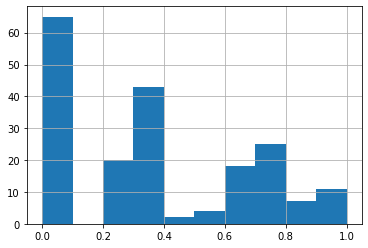

In [29]:
trade.수출금액.hist()

In [30]:
bins = [0, 0.3, 0.5, 0.7, 1.0]

In [31]:
cut = pd.cut(trade.수출금액, bins=bins)
cut

0      (0.7, 1.0]
1      (0.0, 0.3]
2      (0.0, 0.3]
3      (0.5, 0.7]
4      (0.0, 0.3]
          ...    
191    (0.3, 0.5]
192    (0.0, 0.3]
193    (0.5, 0.7]
194    (0.0, 0.3]
195    (0.0, 0.3]
Name: 수출금액, Length: 195, dtype: category
Categories (4, interval[float64]): [(0.0, 0.3] < (0.3, 0.5] < (0.5, 0.7] < (0.7, 1.0]]

In [32]:
print('수출금액[0]:', trade.수출금액[0])
print('수출금액[0]가 속한 카테고리:', cut[0])

수출금액[0]: 0.7947283685095736
수출금액[0]가 속한 카테고리: (0.7, 1.0]


In [33]:
cut.value_counts().sort_index()

(0.0, 0.3]    84
(0.3, 0.5]    45
(0.5, 0.7]    22
(0.7, 1.0]    43
Name: 수출금액, dtype: int64

In [34]:
# 구간의 갯수 지정 가능 (10개씩이라고 가정)
cut2 = pd.cut(trade.수출금액, bins=10)
cut2

0         (0.7, 0.8]
1         (0.2, 0.3]
2      (-0.001, 0.1]
3         (0.6, 0.7]
4         (0.2, 0.3]
           ...      
191       (0.3, 0.4]
192    (-0.001, 0.1]
193       (0.6, 0.7]
194       (0.2, 0.3]
195    (-0.001, 0.1]
Name: 수출금액, Length: 195, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [35]:
cut2.value_counts().sort_index()

(-0.001, 0.1]    65
(0.1, 0.2]        0
(0.2, 0.3]       20
(0.3, 0.4]       43
(0.4, 0.5]        2
(0.5, 0.6]        4
(0.6, 0.7]       18
(0.7, 0.8]       25
(0.8, 0.9]        7
(0.9, 1.0]       11
Name: 수출금액, dtype: int64

In [36]:
# qcut: 데이터의 분포를 비슷한 크기의 그룹으로 나누어줌
cut3 = pd.qcut(trade.수출금액, q=10)
cut3

0          (0.792, 1.0]
1        (0.276, 0.325]
2      (0.0329, 0.0483]
3        (0.625, 0.711]
4       (0.0655, 0.276]
             ...       
191      (0.325, 0.355]
192    (-0.001, 0.0329]
193      (0.625, 0.711]
194     (0.0655, 0.276]
195    (-0.001, 0.0329]
Name: 수출금액, Length: 195, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.0329] < (0.0329, 0.0483] < (0.0483, 0.0655] < (0.0655, 0.276] ... (0.355, 0.625] < (0.625, 0.711] < (0.711, 0.792] < (0.792, 1.0]]

In [37]:
cut3.value_counts().sort_index()

(-0.001, 0.0329]    20
(0.0329, 0.0483]    19
(0.0483, 0.0655]    20
(0.0655, 0.276]     19
(0.276, 0.325]      20
(0.325, 0.355]      19
(0.355, 0.625]      19
(0.625, 0.711]      20
(0.711, 0.792]      19
(0.792, 1.0]        20
Name: 수출금액, dtype: int64